#Water Potability


###Anggota Kelompok

TI-3G

1. Muhammad Ghaniyu Haq Haryanto&emsp;&emsp;|| 2041720178 ||17
2. Raka Bagas Fitriansyah&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; || 2041720187 || 19
3. Wahyu Rizky Akbari&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|| 2041720191 || 27

###Deskripsi

Akses ke air minum yang aman sangat penting untuk kesehatan, hak asasi manusia dan komponen kebijakan yang efektif untuk perlindungan kesehatan. Hal ini penting sebagai isu kesehatan dan pembangunan di tingkat nasional, regional dan lokal. Di beberapa daerah, terlihat bahwa investasi dalam penyediaan air dan sanitasi dapat menghasilkan keuntungan ekonomi bersih, karena penurunan dampak kesehatan yang merugikan dan biaya perawatan kesehatan lebih besar daripada biaya untuk melakukan intervensi.

###Metode

1. Gaussian Naive Bayes
2. Random Forest

###Import Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
%matplotlib inline

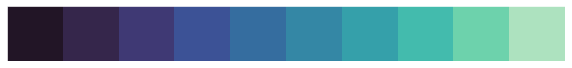

In [17]:
colors= sns.color_palette("mako", 10)
sns.palplot(colors)

###Setup Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd

path='/content/drive/MyDrive/FinalProjectML/water_potability.csv'
data = pd.read_csv(path)

In [6]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           3276 non-null   float64
 1   Hardness     3276 non-null   float64
 2   Solids       3276 non-null   float64
 3   Chloramines  3276 non-null   float64
 4   Sulfate      3276 non-null   float64
 5   Potability   3276 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 153.7 KB


###Drop Kolom 

In [8]:
del data['Conductivity']
del data['Organic_carbon']
del data['Trihalomethanes']
del data['Turbidity']

Menghapus kolom conductivity, organic_carbon, thrihalomethanes, turbidity karena tidak berhubungan dengan apa tujuan dari akurasi kami

In [9]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,0


###Mengisi NaN dengan Mean

In [10]:
data['ph'].fillna(data['ph'].mean(), inplace=True)
data['Sulfate'].fillna(data['Sulfate'].mean(), inplace=True)

In [14]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,0


In [13]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,1.000000


###Visualisasi Awal Data

####Bar Plot

Jumlah potability pada data

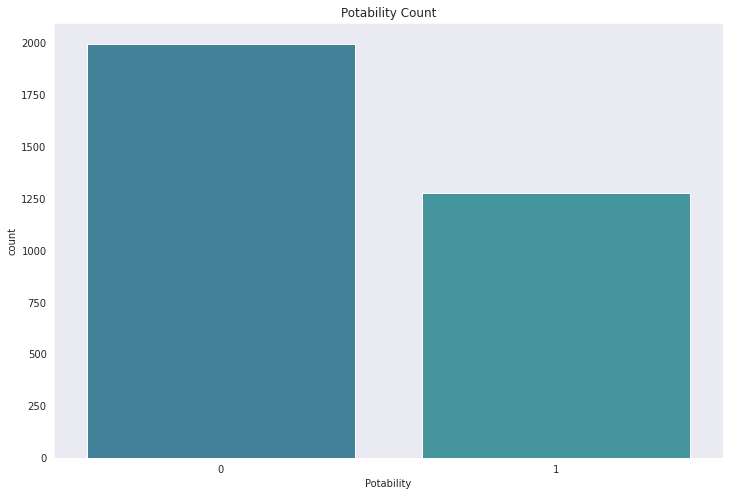

In [18]:
plt.figure(figsize=(12,8))
plt.title('Potability Count')
sns.set_style('dark')
sns.countplot(data['Potability'], palette=colors[5:7]) 

####Histogram Plot

Jumlah potability berdasarkan tiap kolom

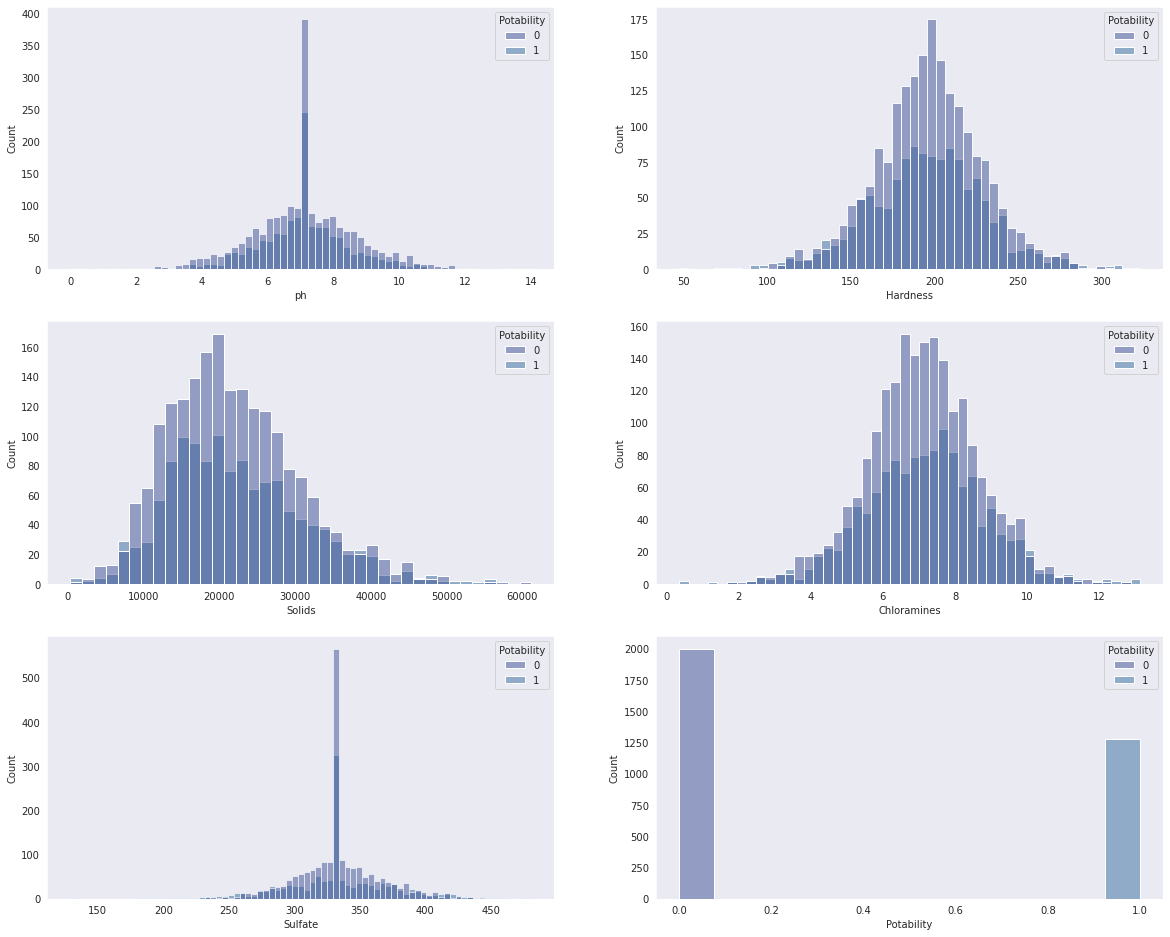

In [19]:
plt.figure(figsize=(20,28))
sns.set_style('dark')
i = 1
for col in data.columns:
    plt.subplot(5, 2, i)
    sns.histplot(data = data, x = data[col], hue ='Potability', palette=colors[3:5])
    i+=1

###Korelasi Potability Pada Tiap Kolom

In [15]:
correlation = data.corr()['Potability']
correlation.sort_values(ascending=False)

Potability     1.000000
Solids         0.033743
Chloramines    0.023779
ph            -0.003287
Hardness      -0.013837
Sulfate       -0.020619
Name: Potability, dtype: float64

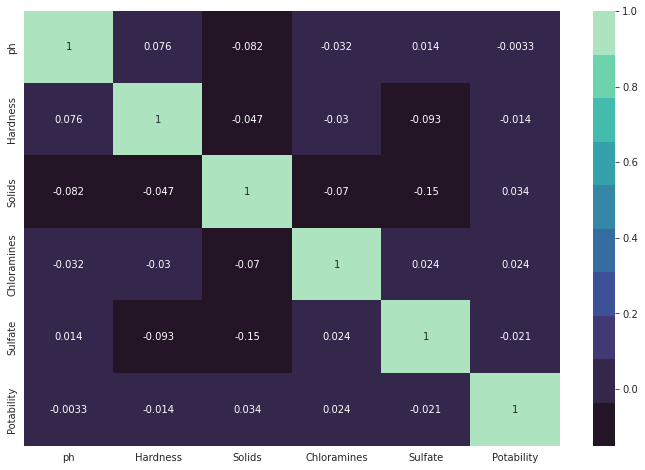

In [20]:
plt.figure(figsize=(12,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap=colors)

###Proses Split Data

In [21]:
X = data.drop(['Potability'], axis=1)
y = data['Potability']

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [23]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate
2833,8.149437,220.203734,23978.10768,7.384126,360.414005
1830,5.404511,258.903489,10168.17654,9.648197,248.711963
2800,7.893313,220.348320,14444.28960,8.037400,300.152172
2982,8.847881,190.700853,11705.07228,6.663397,380.592491
2838,6.761414,216.532498,32156.81944,8.723064,343.601104
...,...,...,...,...,...
1095,4.187491,208.374188,21809.70983,5.846112,327.474203
1130,7.793915,164.958947,25506.91224,7.868036,358.259200
1294,6.630364,186.761088,30939.02321,7.703481,333.775777
860,8.783168,218.032840,16183.58665,7.390474,334.053885


In [24]:
X_train.shape, X_valid.shape

((2784, 5), (492, 5))

In [25]:
y_train.shape, y_valid.shape

((2784,), (492,))

###Scaling Data

In [26]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [27]:
X_train

array([[0.58210266, 0.58771166, 0.38429677, 0.55045997, 0.65736893],
       [0.38603648, 0.74273903, 0.15602758, 0.72768666, 0.3400612 ],
       [0.56380805, 0.58829086, 0.22670895, 0.60159687, 0.48618544],
       ...,
       [0.47359742, 0.45374375, 0.49935618, 0.57545836, 0.58169873],
       [0.62736912, 0.57901528, 0.2554584 , 0.55095688, 0.58248874],
       [0.47843956, 0.49991248, 0.56112371, 0.46274768, 0.65685428]])

###GaussianNB

Akurasi Beserta Confusion Matrix

0.64

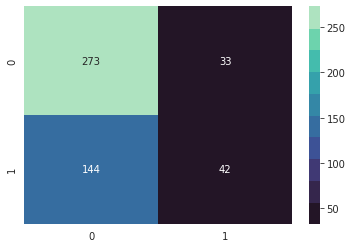

In [30]:
model_1 = GaussianNB()
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=colors)
acc_1 = round(accuracy_score(y_valid, y_pred), 3)
acc_1

###Random Forest


Akurasi beserta Confusion Matrix

0.661

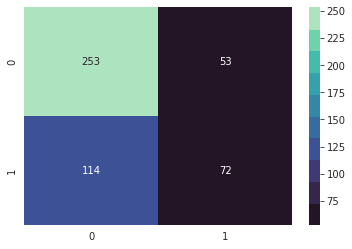

In [31]:
model_2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=colors)
acc_2 = round(accuracy_score(y_valid, y_pred), 3)
acc_2

###Perbandingan Akurasi

In [32]:
model_accuracy = pd.DataFrame({
    'Model': ['Naive Bayes','Random Forest'],
    'Score': [acc_1, acc_2]})
model_accuracy = model_accuracy.sort_values(by='Score', ascending=False)
model_accuracy

,Model,Score
1,Random Forest,0.661
0,Naive Bayes,0.640


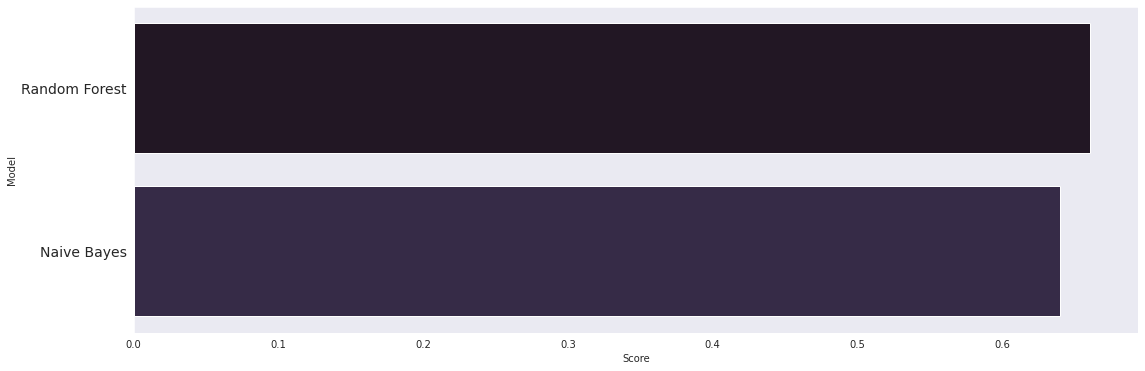

In [33]:
plt.figure(figsize=(18, 6))
plt.yticks(fontsize=14)
sns.barplot(y = model_accuracy['Model'], x = model_accuracy['Score'], palette=colors)

In [34]:
print(f"Random Forest Memiliki Akurasi Lebih Baik {acc_2}")

Random Forest Memiliki Akurasi Lebih Baik 0.661
